# Importing modules

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Question 1

# Loading train and test Datasets

In [2]:
# Skip the first skiprows lines, including comments

# Load the training data
train = np.loadtxt('./p1_train.csv', delimiter=',', skiprows=1) 

# Load the test data
test = np.loadtxt('./p1_test.csv', delimiter=',', skiprows=1)

In [3]:
# Storing train and test data and dividing them into input and target variables
X_train, y_train = train[:, :-1], train[:, -1]  # input features and target variable
X_test, y_test = test[:, :-1], test[:, -1]  # input features and target variable

# Linear Regression by steepest descent method

In [4]:
weight_vector=np.random.randn(X_train.shape[1])
intercept = 0 
alpha = 0.001 # learning rate
epoch = 5000 # no of iterations

In [5]:
# to calculate the loss
def loss(y,y_predicted):  
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [6]:
# code for "wx+b"
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product between weight and input
    return np.array(y_lst)

In [7]:
#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [8]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [9]:
# calculating the weight/model parameters values through our train data
for i in range(epoch):
     y_predicted = predicted_y(weight_vector,X_train,intercept)
     weight_vector = weight_vector - alpha *dldw(X_train,y_train,y_predicted)  #update weight
     intercept = intercept - alpha * dldb(y_train,y_predicted)    #update bias

In [10]:
# My model parameters
print(f"Intercept: {intercept} Model Parameters: {weight_vector}")

Intercept: 2.978481429168462 Model Parameters: [-1.99966988 -0.99729939]


In [11]:
# predicting on my test data by passing the parameters and storing it in y_new variable
y_new = predicted_y(weight_vector.tolist(),X_test,intercept)

In [12]:
# function to get errors and p-value
def errors(predictions, y_test):

    #calculating mean absolute error
    MAE = np.mean(np.abs(predictions - y_test))

    #calculating root mean square error
    MSE = np.square(np.subtract(y_test,predictions)).mean() 

    # calculating p-value
    n = y_test.shape[0]
    df = n - X_test.shape[1]  # degrees of freedom
    se = np.sqrt(np.sum((predictions - y_test) ** 2) / df)
    t = (predictions - y_test) / se
    p = 2 * (1 - stats.t.cdf(np.abs(t), df))
    
    
    return MAE, MSE, p[0]

In [13]:
mae, mse, p = errors(y_new, y_test)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("p-value:", p)

Mean Absolute Error: 1.7998114655970894
Mean Squared Error: 5.049788530263382
p-value: 0.19940008389744923


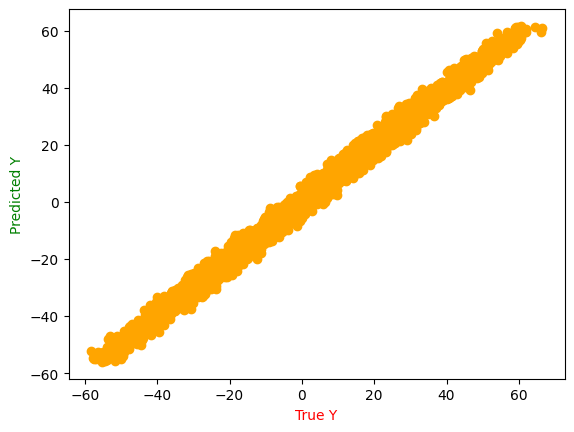

In [14]:
# Plot the predicted values against the true values on a scatter plot
plt.scatter(y_test, y_new, color = 'orange')
plt.xlabel('True Y', color = "red")
plt.ylabel('Predicted Y',color = "green")
plt.show()

# Linear Regression by Normal Equation

In [15]:
# using normal equation to get parameters
def normal_equation(X_train, y_train):
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    parameters = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    return parameters

In [16]:
# predicting 
def predict(X_test, parameters):
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    y_pred = X_test @ theta
    return y_pred

In [19]:
# passing values in our function
theta = normal_equation(X_train, y_train)
y_pred = predict(X_test, theta)
print(theta)

[ 2.97861551 -1.99966977 -0.99729949]


In [20]:
mae, mse, p = errors(y_pred, y_test)
print("Mean Absolute Error: ", mae)
print("Mean Square Error: ", mse)
print("p-value: ", p)

Mean Absolute Error:  1.7998085941558195
Mean Square Error:  5.049771909355411
p-value:  0.19942032495817652


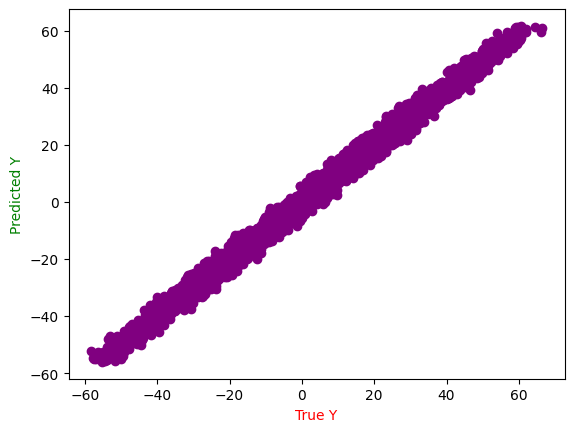

In [21]:
# Plot the predicted values against the true values on a scatter plot
plt.scatter(y_test, y_pred, color = "purple")
plt.xlabel('True Y', color = "red")
plt.ylabel('Predicted Y',color = "green")
plt.show()